In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
x = "/content/drive/MyDrive/Loan Approval EDA/loan_sanction_test.csv"

In [ ]:
df= pd.read_csv(x)

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
df.shape

(367, 12)

In [ ]:
df.duplicated().sum()

np.int64(0)

missing values finding and handling


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [ ]:
df.isnull().sum()/df.shape[0]*100

,0
Loan_ID,0.000000
Gender,2.997275
Married,0.000000
Dependents,2.724796
Education,0.000000
Self_Employed,6.267030
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,1.362398
Loan_Amount_Term,1.634877


<Axes: >

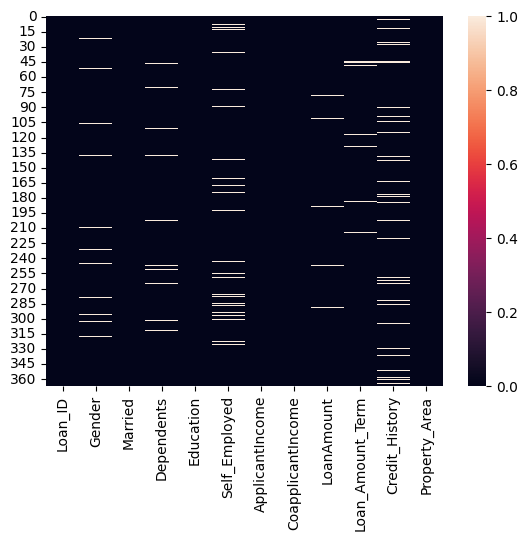

In [ ]:
sns.heatmap(df.isnull())

Filling missing values

cat columns that have missing values

In [ ]:
cat_columns = ['Gender','Dependents','Self_Employed']

In [ ]:
def fill_missing_with_mode(df, cat_cols):
    for col in cat_cols:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
    return df

In [ ]:
df = fill_missing_with_mode(df, cat_columns)


/tmp/ipython-input-3317643933.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


In [ ]:
print(df[cat_columns].isnull().sum())


Gender           0
Dependents       0
Self_Employed    0
dtype: int64


In [ ]:
#df["Dependents"] = df["Dependents"].replace('3+', '3').astype(int)

In [ ]:
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].mean())
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean())
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].mean())


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


<Axes: >

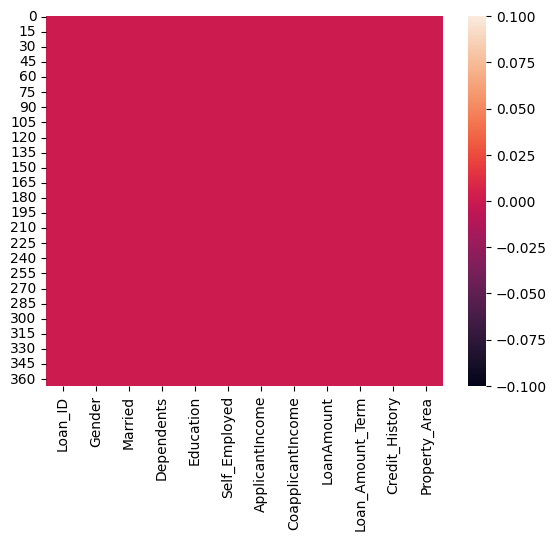

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,60.946040,64.620366,0.364778
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,126.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


**Task 2: Data Visualization**

** 2.1 Univariate Analysis**

**Histograms**: Plot the frequency distribution of key numeric variables.

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Credit_History']).columns
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

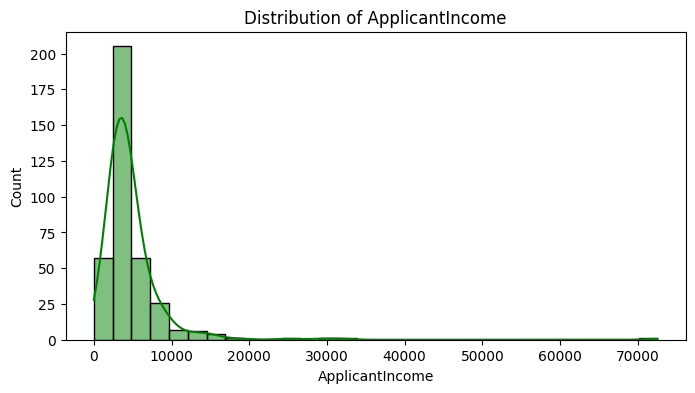

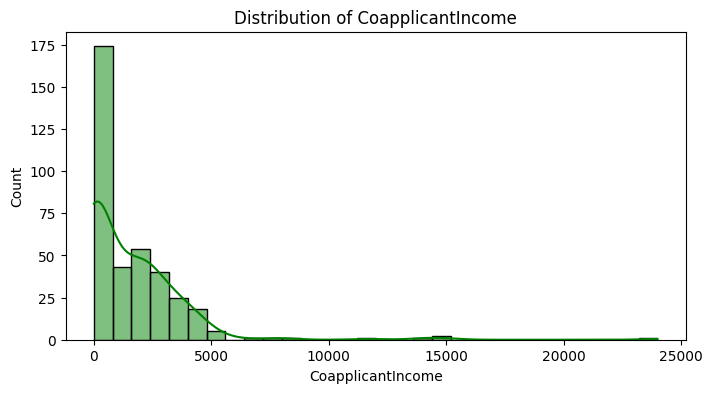

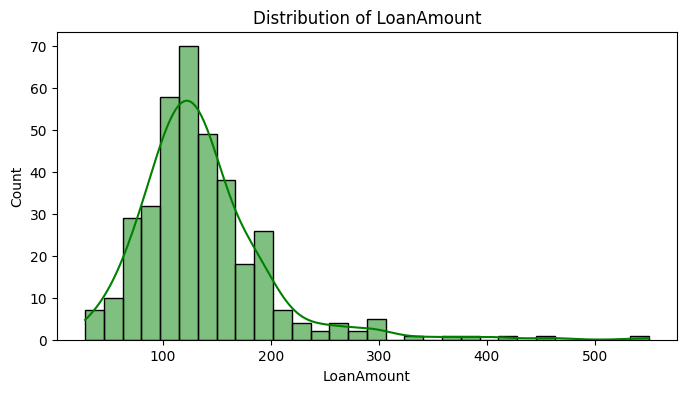

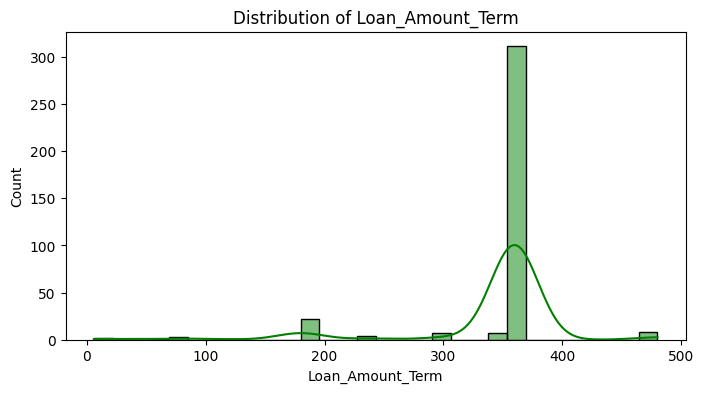

In [ ]:
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='green')
    plt.title(f'Distribution of {col}')
    plt.show()

**Insights Summary**

**ApplicantIncome Distribution:**


The income of applicants is right-skewed, indicating most applicants earn lower to moderate incomes, but a small group earns significantly higher amounts. This skewness suggests income varies widely among applicants, and there may be outliers with high incomes.

**CoapplicantIncome Distribution:**

The coapplicant income is heavily concentrated near zero, showing most applicants do not have a coapplicant or the coapplicant has little to no income. The distribution may show a sharp drop after zero, with fewer cases of high coapplicant incomes.

**LoanAmount Distribution:**


The loan amount applied for is also right-skewed with the majority of loans concentrated in the lower range, while a few applicants request larger loans. This skewness indicates varying loan needs and risk profiles.

**Loan_Amount_Term Distribution:**


The loan terms mostly cluster around typical durations such as 360 months (30 years), with fewer loans with shorter or longer terms. This reflects standard repayment plans in lending practices.

**Box Plots:** Identify potential outliers and visualize the spread of
data.

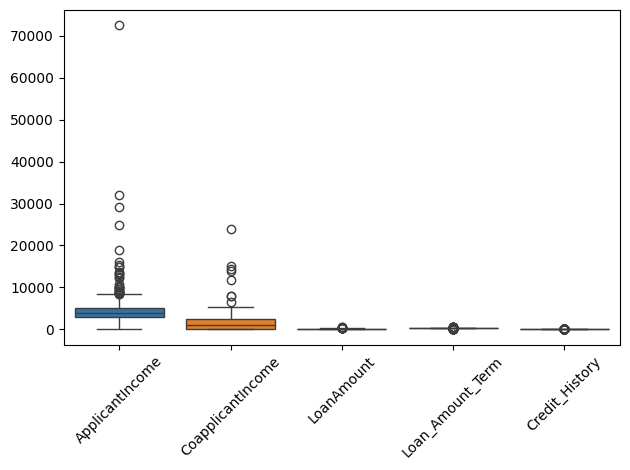

In [ ]:
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ApplicantIncome

In [ ]:
q1=df['ApplicantIncome'].quantile(0.25)
q3=df['ApplicantIncome'].quantile(0.75)

iqr=q3-q1

lower_bound= q1 -1.5 * iqr
upper_bound= q3 +1.5 * iqr
print(f"the IQR of ApplicantIncome is : {iqr}")
print(f"the lower bound of ApplicantIncome is : {lower_bound}")
print(f"the upper bound of ApplicantIncome is : {upper_bound}")

outliers=df[(df['ApplicantIncome'] <lower_bound) | (df['ApplicantIncome']<upper_bound)]
print(f"Number of outliers in ApplicantIncome : {len(outliers)}")

the IQR of ApplicantIncome is : 2196.0
the lower bound of ApplicantIncome is : -430.0
the upper bound of ApplicantIncome is : 8354.0
Number of outliers in ApplicantIncome : 335


Capping outliers (also known as Winsorization) is a data-cleaning technique used to handle extreme values without removing any data points altogether. Instead of deleting outliers, this method replaces extreme values with more reasonable limits—typically using the percentiles or the Interquartile Range (IQR) method

In [ ]:
df["ApplicantIncome"]=np.where(df["ApplicantIncome"]<=lower_bound,lower_bound,df["ApplicantIncome"])
df["ApplicantIncome"]=np.where(df["ApplicantIncome"]>=upper_bound,upper_bound,df["ApplicantIncome"])

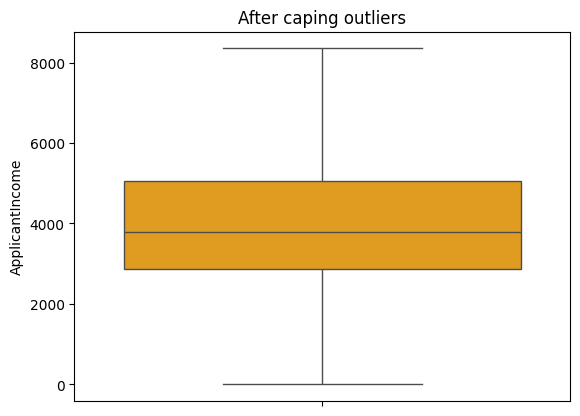

In [ ]:
sns.boxplot(df["ApplicantIncome"],color="orange")
plt.title("After caping outliers")
plt.show()


**insights:**

"ApplicantIncome showed a wide variability with several extreme high-income outliers. After applying the IQR method, these outliers were capped at the calculated upper and lower bounds to minimize their influence. This step standardized income distribution and maintained the integrity of the data, ensuring more robust analysis in subsequent modeling."

coapplicantIncome

In [ ]:
q1=df['CoapplicantIncome'].quantile(0.25)
q3=df['CoapplicantIncome'].quantile(0.75)

iqr=q3-q1

lower_bound= q1 -1.5 * iqr
upper_bound= q3 +1.5 * iqr
print(f"the IQR of ApplicantIncome is : {iqr}")
print(f"the lower bound of ApplicantIncome is : {lower_bound}")
print(f"the upper bound of ApplicantIncome is : {upper_bound}")

outliers=df[(df['CoapplicantIncome'] <lower_bound) | (df['CoapplicantIncome']<upper_bound)]
print(f"Number of outliers in CoapplicantIncome : {len(outliers)}")

the IQR of ApplicantIncome is : 2430.5
the lower bound of ApplicantIncome is : -3645.75
the upper bound of ApplicantIncome is : 6076.25
Number of outliers in CoapplicantIncome : 359


In [ ]:
df["CoapplicantIncome"]=np.where(df["CoapplicantIncome"]<=lower_bound,lower_bound,df["CoapplicantIncome"])
df["CoapplicantIncome"]=np.where(df["CoapplicantIncome"]>=upper_bound,upper_bound,df["CoapplicantIncome"])

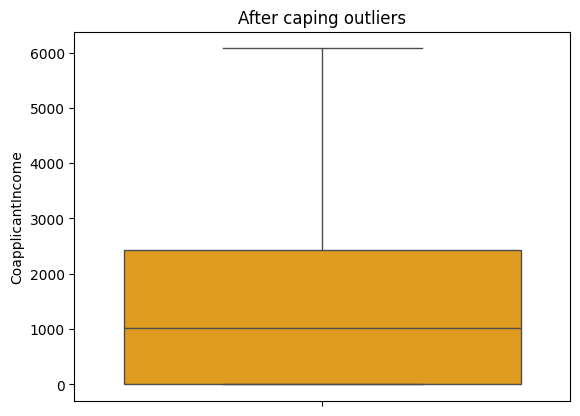

In [ ]:
#Boxplot after caping
sns.boxplot(df["CoapplicantIncome"],color="orange")
plt.title("After caping outliers")
plt.show()


**Insight**:
Capping the outliers in CoapplicantIncome helped in stabilizing the data distribution and prevented the extreme income values from skewing the analysis. This ensures that future statistical summaries and visualizations reflect a more accurate representation of the typical coapplicant income range.

Loan_amount

In [ ]:
q1=df['LoanAmount'].quantile(0.25)
q3=df['LoanAmount'].quantile(0.75)

iqr=q3-q1

lower_bound= q1 -1.5 * iqr
upper_bound= q3 +1.5 * iqr
print(f"the IQR of ApplicantIncome is : {iqr}")
print(f"the lower bound of ApplicantIncome is : {lower_bound}")
print(f"the upper bound of ApplicantIncome is : {upper_bound}")

outliers=df[(df['LoanAmount'] <lower_bound) | (df['LoanAmount']<upper_bound)]
print(f"Number of outliers in LoanAmount : {len(outliers)}")

the IQR of ApplicantIncome is : 56.5
the lower bound of ApplicantIncome is : 16.25
the upper bound of ApplicantIncome is : 242.25
Number of outliers in LoanAmount : 349


In [ ]:
 #Caping outliers
df["LoanAmount"]=np.where(df["LoanAmount"]<=lower_bound,lower_bound,df["LoanAmount"])
df["LoanAmount"]=np.where(df["LoanAmount"]>=upper_bound,upper_bound,df["LoanAmount"])

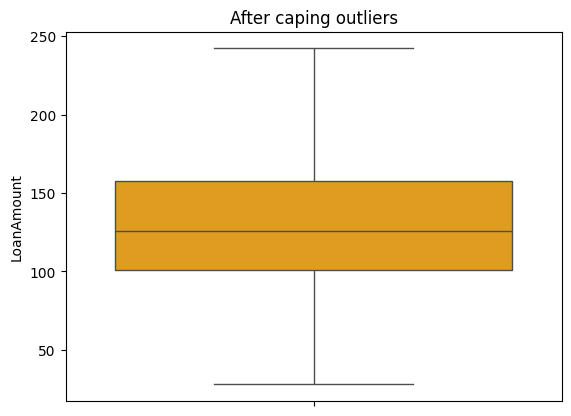

In [ ]:
#Boxplot after caping
sns.boxplot(df["LoanAmount"],color="orange")
plt.title("After caping outliers")
plt.show()

**Insight**:
Capping the extreme values in LoanAmount helped reduce the influence of unusually high or low loan amounts on the analysis. This ensures that the average and median loan values better represent the typical loan size in the dataset, leading to more reliable insights and visualizations.

Loan_Amount_term

In [ ]:
q1=df['Loan_Amount_Term'].quantile(0.25)
q3=df['Loan_Amount_Term'].quantile(0.75)

iqr=q3-q1

lower_bound= q1 -1.5 * iqr
upper_bound= q3 +1.5 * iqr
print(f"the IQR of ApplicantIncome is : {iqr}")
print(f"the lower bound of ApplicantIncome is : {lower_bound}")
print(f"the upper bound of ApplicantIncome is : {upper_bound}")

outliers=df[(df['Loan_Amount_Term'] <lower_bound) | (df['Loan_Amount_Term']<upper_bound)]
print(f"Number of outliers in Loan_Amount_Term : {len(outliers)}")

the IQR of ApplicantIncome is : 0.0
the lower bound of ApplicantIncome is : 360.0
the upper bound of ApplicantIncome is : 360.0
Number of outliers in Loan_Amount_Term : 48


In [ ]:
#Caping outliers
df["Loan_Amount_Term"]=np.where(df["Loan_Amount_Term"]<=lower_bound,lower_bound,df["Loan_Amount_Term"])
df["Loan_Amount_Term"]=np.where(df["Loan_Amount_Term"]>=upper_bound,upper_bound,df["Loan_Amount_Term"])

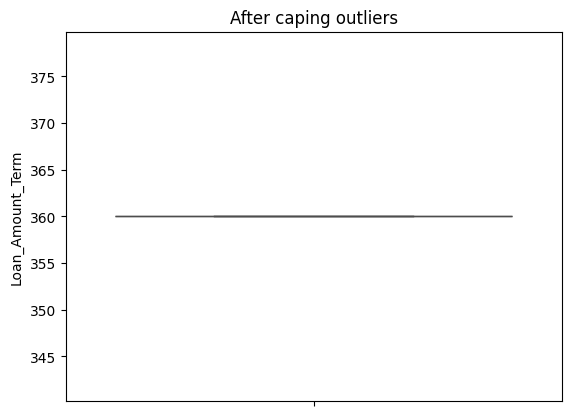

In [ ]:
#Boxplot after caping
sns.boxplot(df["Loan_Amount_Term"],color="orange")
plt.title("After caping outliers")
plt.show()

**Insight**:
After treating outliers in Loan_Amount_Term, the term durations became more evenly distributed. This helps ensure that further analysis (like comparing loan term vs loan amount or approval rate) reflects a more realistic view of loan durations offered to applicants.

Credit_History

In [ ]:
## calculate iqr and outliers_fence
q1=df["Credit_History"].quantile(0.25)
q3=df["Credit_History"].quantile(0.75)
iqr=q3-q1
iqr

np.float64(0.0)

**Bar Charts:**
Visualize the frequency distribution of categorical
variables.

In [ ]:
temp_df = df.select_dtypes(include=["object"]).columns.drop("Loan_ID")
temp_df

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

/tmp/ipython-input-3322541280.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


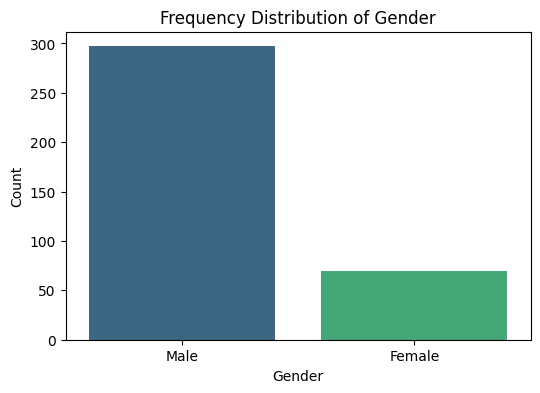

/tmp/ipython-input-3322541280.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


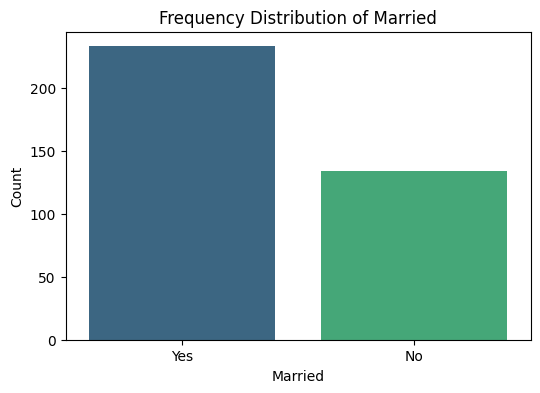

/tmp/ipython-input-3322541280.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


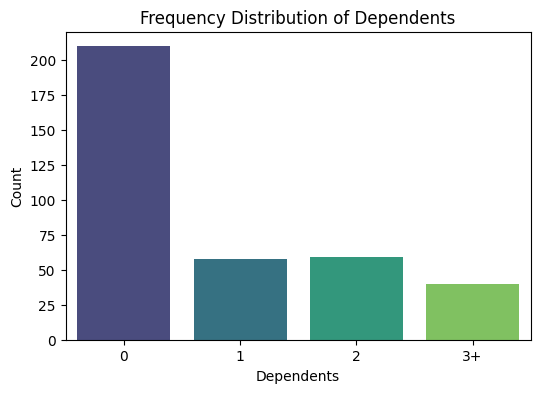

/tmp/ipython-input-3322541280.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


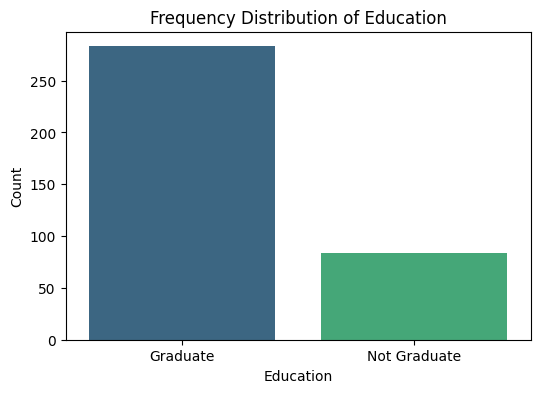

/tmp/ipython-input-3322541280.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


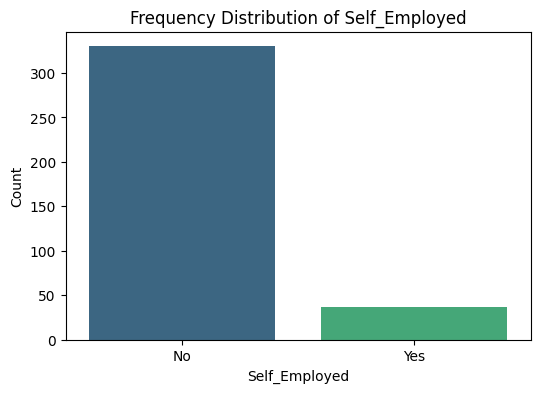

/tmp/ipython-input-3322541280.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


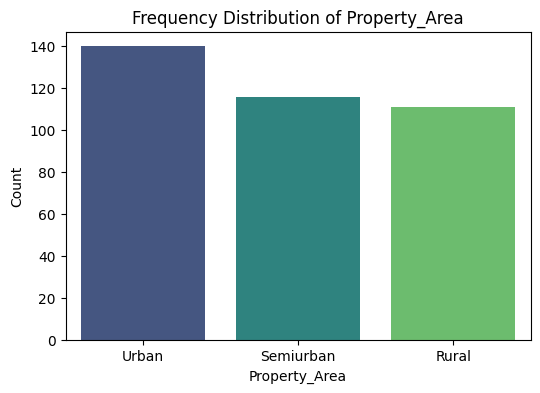

In [ ]:
for col in temp_df:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], palette='viridis')
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

Insight Summaries for Categorical Bar Charts


**Gender**
The majority of loan applicants are male, indicating a gender skew in the applicant pool. Fewer applications were submitted by females, highlighting potential gender-based trends in seeking loans.

**Married**
Most applicants are married, suggesting that married individuals are more likely to apply for loans. This could reflect financial decisions being made collectively within families or the impact of joint income and collateral.

**Dependents**
The highest frequency is observed for applicants with zero dependents, followed by those with one dependent. There are fewer applicants reporting two or three+ dependents, indicating loan applicants typically have smaller or non-existent dependent families.

**Education**
A larger proportion of applicants are graduates as compared to non-graduates. This suggests that higher education may be positively associated with applying for loans, possibly linked to better earning potential and creditworthiness.

**Self_Employed**
Salaried applicants outnumber self-employed ones. This may indicate that either salaried individuals are more comfortable seeking loans, or that lending institutions attract more applicants from the salaried segment due to perceived lower risk.

**Property_Area**
Semiurban areas record the highest number of applications, followed by urban and then rural areas. This shows more loan activity in semiurban regions, potentially due to growth opportunities or easier access to loan services.

**Pie Charts:** Represent the composition of categorical variables.

In [ ]:
df_2= df.select_dtypes(include="object")
df_2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,Urban
1,LP001022,Male,Yes,1,Graduate,No,Urban
2,LP001031,Male,Yes,2,Graduate,No,Urban
3,LP001035,Male,Yes,2,Graduate,No,Urban
4,LP001051,Male,No,0,Not Graduate,No,Urban
...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,Urban
363,LP002975,Male,Yes,0,Graduate,No,Urban
364,LP002980,Male,No,0,Graduate,No,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,Rural


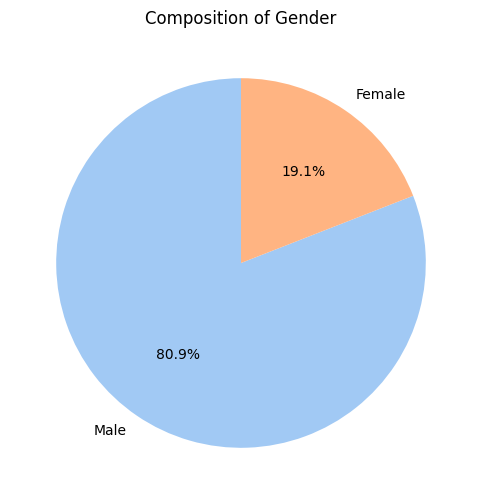

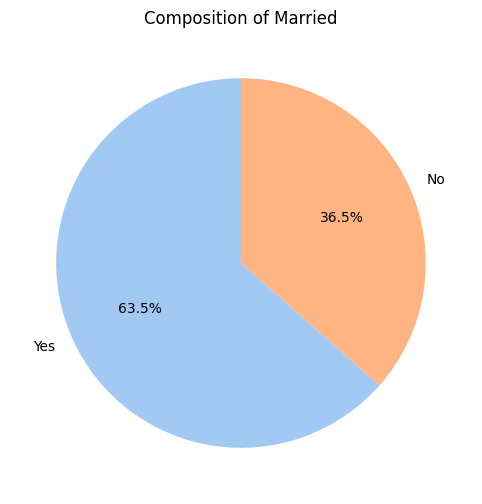

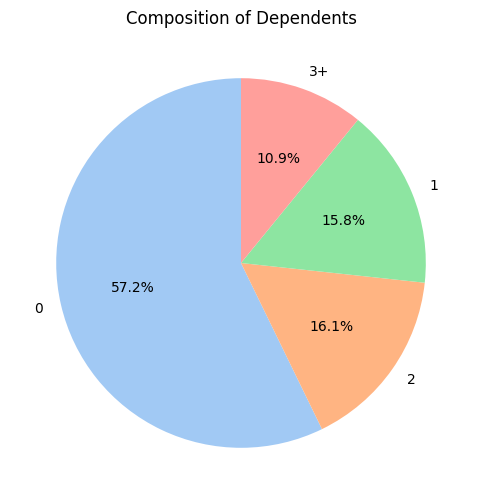

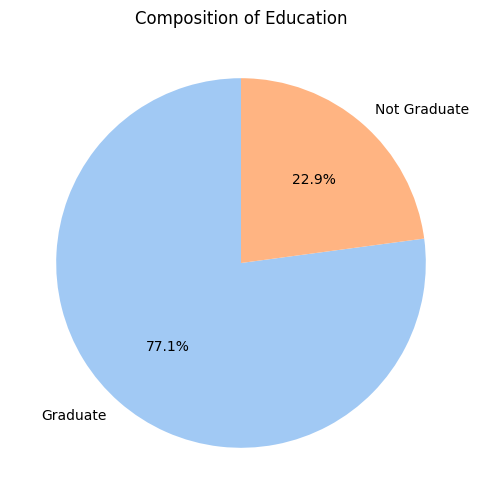

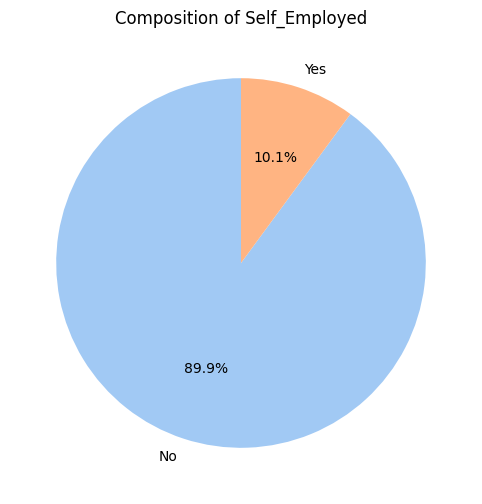

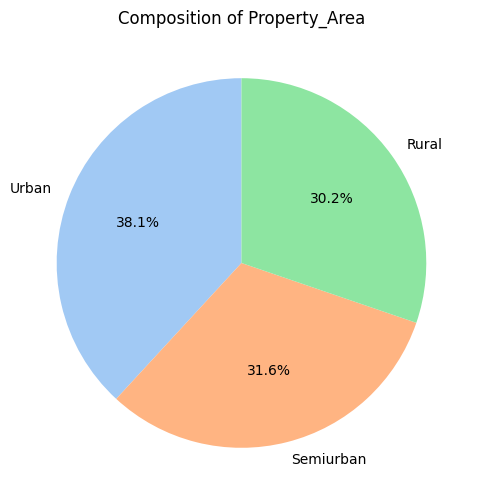

In [ ]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

for col in cat_cols:
    plt.figure(figsize=(8, 6))
    colors = sns.color_palette("pastel", n_colors=df[col].nunique())
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=colors)
    plt.title(f'Composition of {col}')
    plt.ylabel('')
    plt.show()


Pie Chart Insights for Categorical Variables
Gender
• Male applicants: 80.9%
• Female applicants: 19.1%
• Indicates a significant gender imbalance in the dataset.
Male applicants form the majority segment,female applicants represent a significantly smaller portion, indicating a substantial gender gap among borrowers.

Married
• Married applicants: 63.5%
• Unmarried applicants: 36.5%
• Indicates that the majority of loan applicants are married.
• Marital status may be a relevant factor in loan eligibility or approval trends.
Married individuals constitute most loan seekers, with a large majority slice. Single applicants form a minority, suggesting that married individuals may perceive higher need or eligibility for loans, possibly due to combined income or family responsibilities.

Dependents
The zero dependents category dominates, making up nearly half or more of applicants. Small slices for one, two, and three or more dependents show that most applicants have few or no dependents, indicating that financial responsibility for others is less common among loan seekers.

Education
• Graduates: 77.1%
• Not Graduates: 22.9%
• Majority of applicants have graduation-level education.
• Education may influence loan approval, creditworthiness, or income stability.
Graduates account for the largest share of applications, suggesting higher educational attainment among borrowers. Non-graduates, while present, form a notably smaller slice, possibly hinting that educational background is linked to credit access or confidence in financial management.

Self_Employed
• Not Self-Employed: 89.9%
• Self-Employed: 10.1%
• Majority of applicants are salaried or employed by others.
Salaried applicants comprise the majority, while self-employed individuals represent a much smaller percentage. This could reflect a preference by lending institutions for the perceived stability of salaried incomes, or lower participation by self-employed borrowers.

Property_Area
Urban applicants: 38.1% (highest proportion)
- Semiurban applicants: 31.6%
-Rural applicants: 30.2% - The dataset is fairly balanced across all areas, with a slight dominance ofurban regions. - Suggests loans are accessed by people from diverse geographic locations, supporting a wide-ranging customer base.
The relatively smaller slice for rural areas may indicate limited access or lower demand for loans, with semiurban regions being key markets for financial products.


Noting the dominance or underrepresentation of certain categories can guide marketing strategies, product development, or fairness checks within your analysis.

**Bivariate** **Analysis**

*   Create scatter plots to explore relationships between pairs of numeric variables.


Applicant Income vs Loan Amount


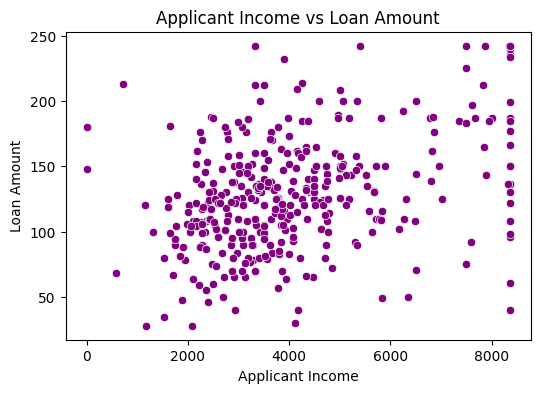

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='ApplicantIncome', y='LoanAmount',
color='purple')
plt.title('Applicant Income vs Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

Key Insights:

1.Applicants with higher incomes generally apply for larger loan amounts, indicating income is a strong influencing factor in loan size.

2.For middle-range incomes, loan amounts vary more widely, suggesting additional factors
(like coapplicant income or credit history) may influence loan decisions.


Scatter Plot in Applicant Income vs Credit_History

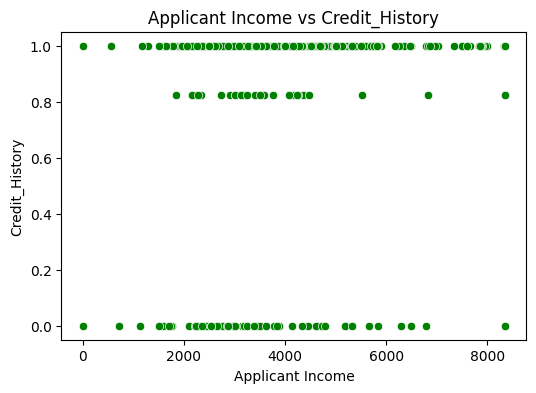

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='ApplicantIncome', y='Credit_History',
color='green')
plt.title('Applicant Income vs Credit_History')
plt.xlabel('Applicant Income')
plt.ylabel('Credit_History')
plt.show()

Key Insights:

1.Applicant income does not show a clear relationship with credit history values (0.0 or 1.0). Both low- and high-income applicants appear in both credit history categories.

2.Good or bad credit history is not limited to a particular income group, suggesting it depends more on financial behavior than earning capacity.

Scatter Plot in ApplicantIncome vs CoapplicantIncome

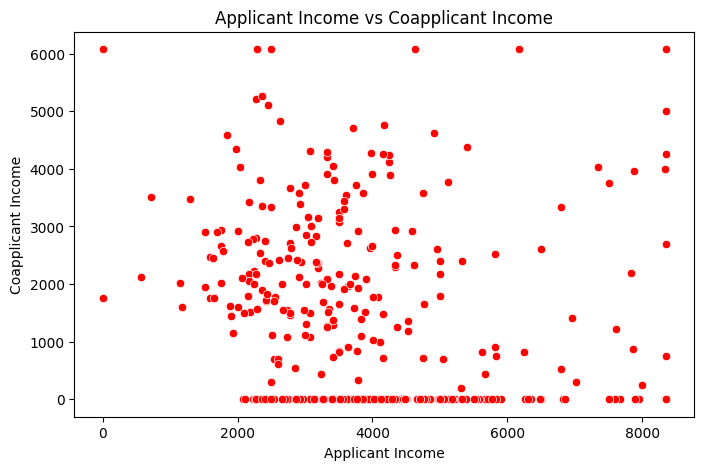

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='ApplicantIncome',
y='CoapplicantIncome',color="red")
plt.title('Applicant Income vs Coapplicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Coapplicant Income')
plt.show()

Key Insights:

1.A large cluster appears where coapplicant income is zero, indicating many applicants apply individually without coapplicants.

2.There are fewer cases where both applicant and coapplicant have high incomes,
suggesting dual high-income applications are less common.

3.Applicant income tends to be the primary source, with coapplicant income acting as a supplementary factor for a smaller group

**CoapplicantIncome vs LoanAmount**

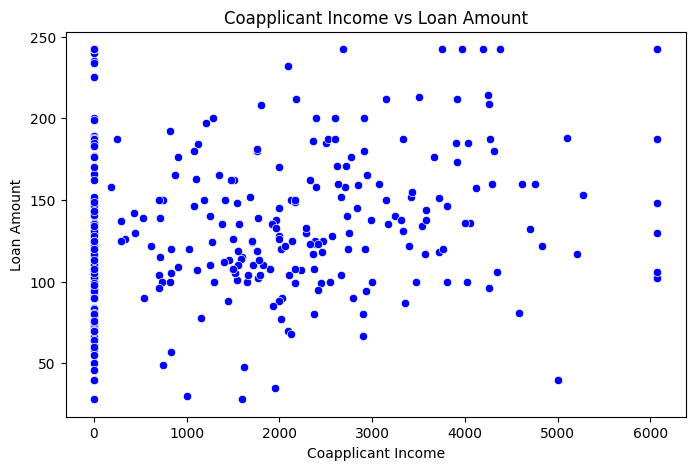

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='CoapplicantIncome',
y='LoanAmount',color='blue')
plt.title('Coapplicant Income vs Loan Amount')
plt.xlabel('Coapplicant Income')
plt.ylabel('Loan Amount')
plt.show()

Key Insights:

1.Loan amounts show no strong or consistent increase with higher coapplicant incomes. Many applicants with zero or low coapplicant income still receive varied loan amounts.

2.The plot suggests that applicant income, rather than coapplicant income, is the primary factor influencing loan amount decisions.

**LoanAmount vs Loan_Amount_Term**

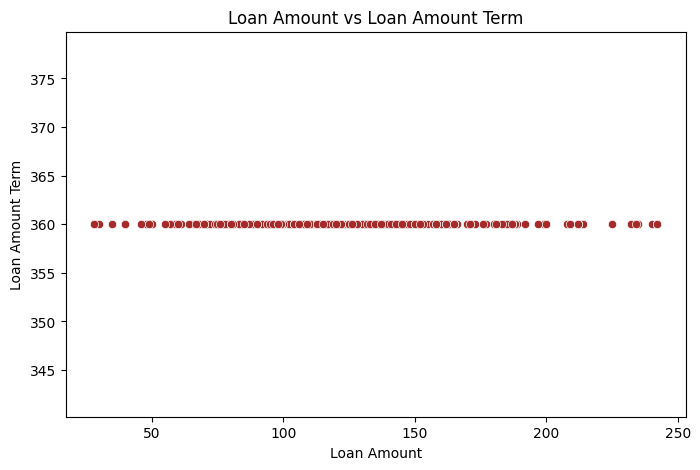

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='LoanAmount',
y='Loan_Amount_Term',color="brown")
plt.title('Loan Amount vs Loan Amount Term')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Amount Term')
plt.show()

Key Insights:

1.Most loan terms cluster around specific values (e.g., 360 months), regardless of loan amount. This indicates financial institutions use standard loan term options rather than customizing terms per loan amount.

2.Both small and large loan amounts are often assigned the same loan term, showing that loan term decisions may be policy-driven rather than amount-driven.

3.Only a small number of records show variation from the standard loan term, suggesting limited flexibility in term options for applicants.

**Credit_History vs LoanAmount**

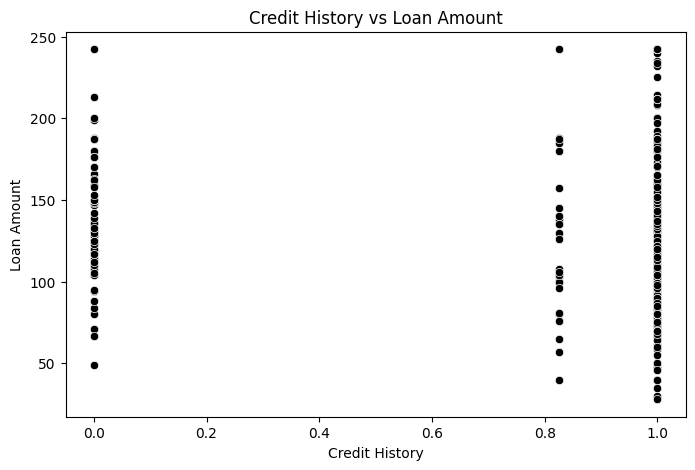

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Credit_History', y='LoanAmount', color='black')
plt.title('Credit History vs Loan Amount')
plt.xlabel('Credit History')
plt.ylabel('Loan Amount')
plt.show()

Key Insights:

1.Applicants with a credit history value of 1.0 generally receive higher loan amounts compared to those with no or poor credit history (0.0).

2.Loan amounts for applicants with credit history value 0.0 are mostly clustered at lower values, showing risk-averse lending behavior by financial institutions.

3.The scatter plot shows two distinct vertical bands, indicating that credit history is a decisive factor in loan sanction amounts.

*  Use pair plots (scatter matrix) to visualize interactions between multiple numeric variables simultaneously.

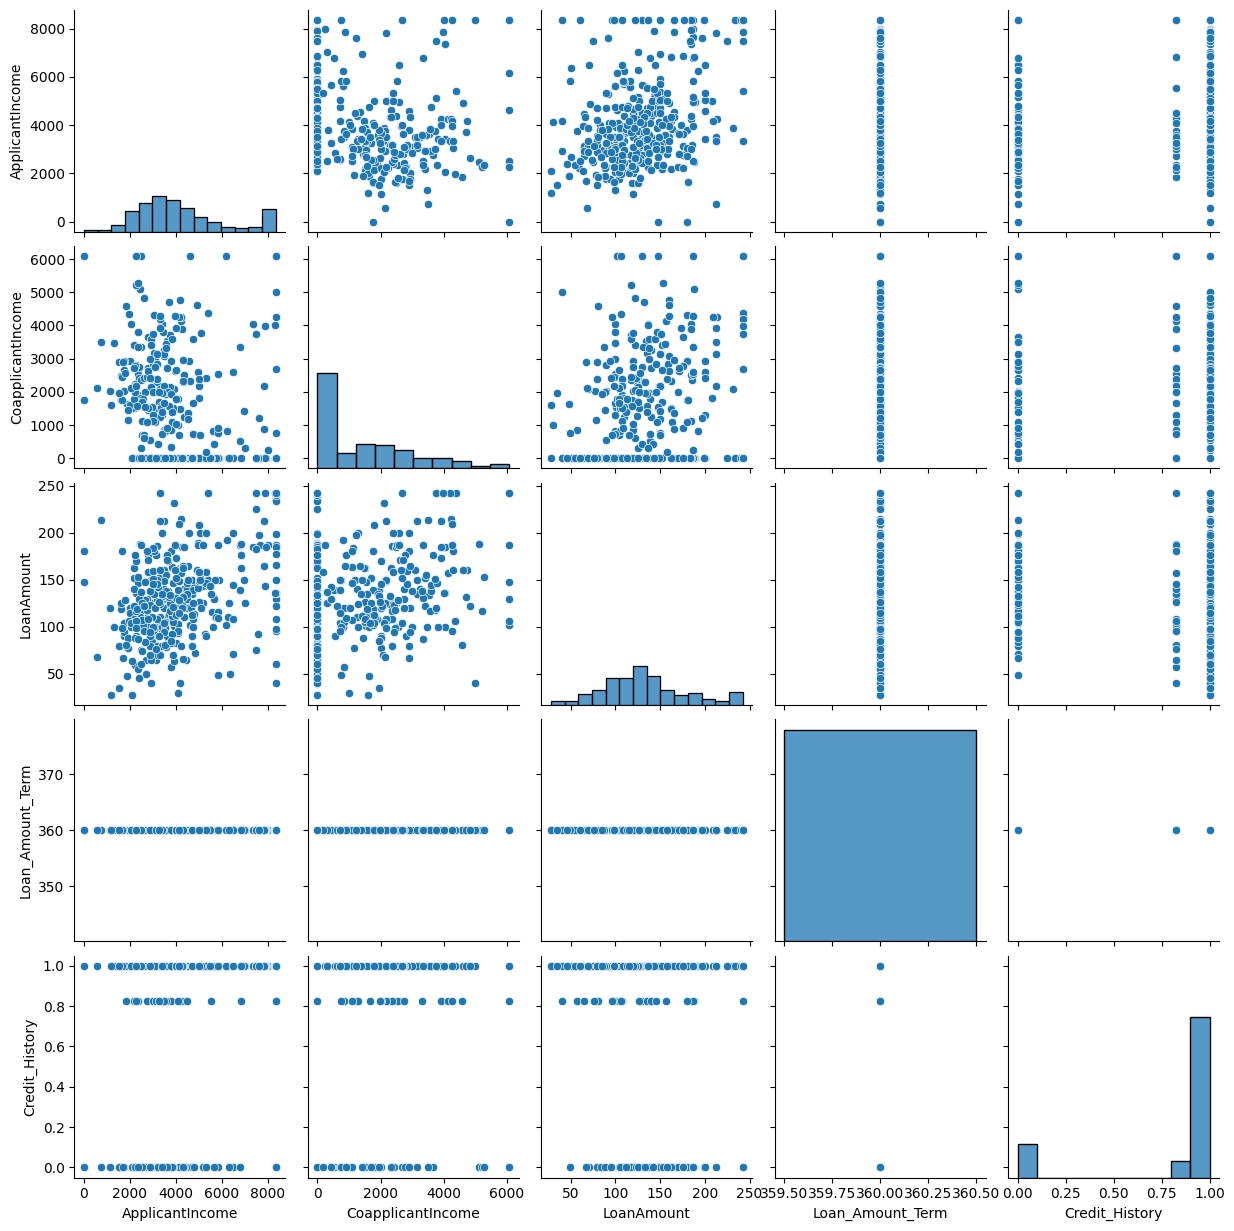

In [ ]:
df_1=df.select_dtypes(include=["int64","float64"])
sns.pairplot(df_1)

* Investigate the relationship between categorical and numeric variables using boxplots or violin plots.



Violinplot of Applicant Income by Property Area

/tmp/ipython-input-62736734.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Property_Area', y='ApplicantIncome', data=df,


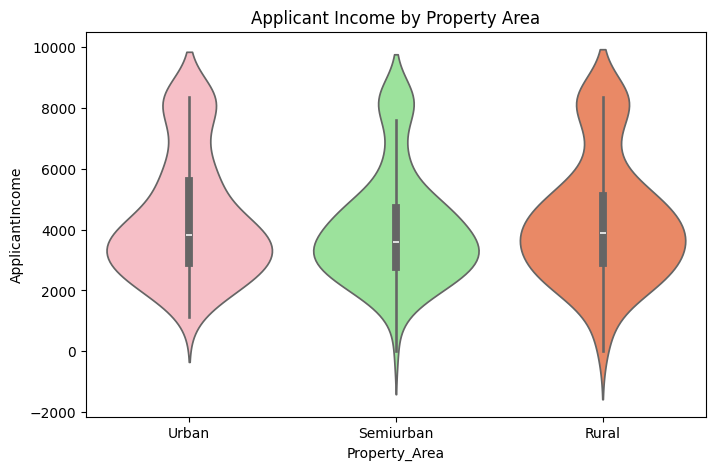

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Property_Area', y='ApplicantIncome', data=df,
palette=["lightpink","lightgreen","coral"])
plt.title('Applicant Income by Property Area')
plt.show()

Key Insights:

1.Urban property areas show a broader distribution of applicant incomes, with more highincome outliers compared to rural and semiurban areas.

2.Applicants from rural areas generally have lower median incomes, with fewer highincome applicants observed.

3.Semiurban areas show a more concentrated distribution around the median, suggesting a more uniform income profile

Violinplot of Loan Amount Distribution by Education

/tmp/ipython-input-2701987211.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Education', y='LoanAmount', data=df,


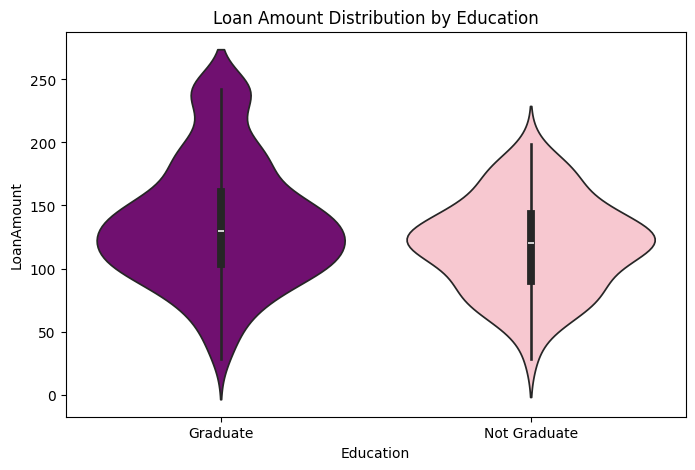

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Education', y='LoanAmount', data=df,
palette=["#800080","#FFC0CB"]) # Using hex codes for purple and pink
plt.title('Loan Amount Distribution by Education')
plt.show()

Key Insights:

1.Both graduates and non-graduates show similar median loan amounts, indicating
education level may not drastically affect the typical loan size.

2.Graduates have a broader range of loan amounts, including higher-value loans, suggesting more diverse borrowing needs or financial capacity.

3.Non-graduate applicants mostly take smaller, more consistent loan amounts, indicating more conservative borrowing behavior.

Boxplot of Self_Employed by CoapplicantIncome

/tmp/ipython-input-270712720.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Self_Employed', y='CoapplicantIncome', data=df,


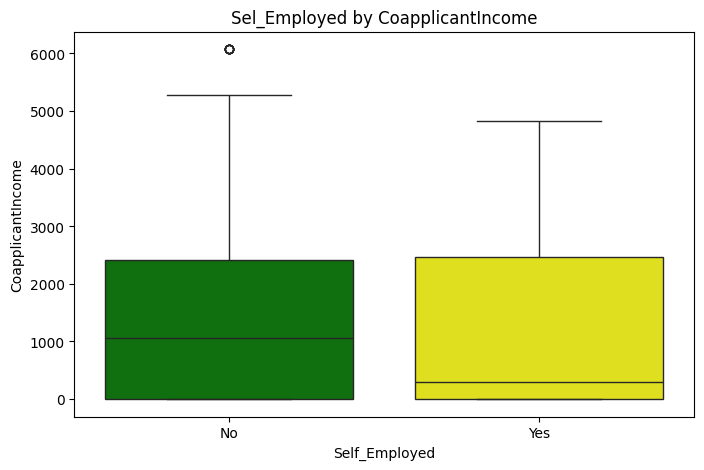

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Self_Employed', y='CoapplicantIncome', data=df,
palette=["green","yellow"])
plt.title('Sel_Employed by CoapplicantIncome')
plt.xlabel('Self_Employed')
plt.ylabel('CoapplicantIncome')
plt.show()

Key Insights:

1.Self-employed applicants generally show lower or zero coapplicant incomes compared to non-self-employed applicants.

2.Non-self-employed applicants exhibit a wider range of coapplicant incomes, suggesting more joint income opportunities (e.g., salaried coapplicants).

**Multivariate Analysis**

*  Perform a correlation analysis to identify relationships between numeric
variables. Visualize correlations using a heatmap.

In [ ]:
numeric_data = df.select_dtypes(include=['number'])
numeric_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5720.0,0.0,110.0,360.0,1.000000
1,3076.0,1500.0,126.0,360.0,1.000000
2,5000.0,1800.0,208.0,360.0,1.000000
3,2340.0,2546.0,100.0,360.0,0.825444
4,3276.0,0.0,78.0,360.0,1.000000
...,...,...,...,...,...
362,4009.0,1777.0,113.0,360.0,1.000000
363,4158.0,709.0,115.0,360.0,1.000000
364,3250.0,1993.0,126.0,360.0,0.825444
365,5000.0,2393.0,158.0,360.0,1.000000


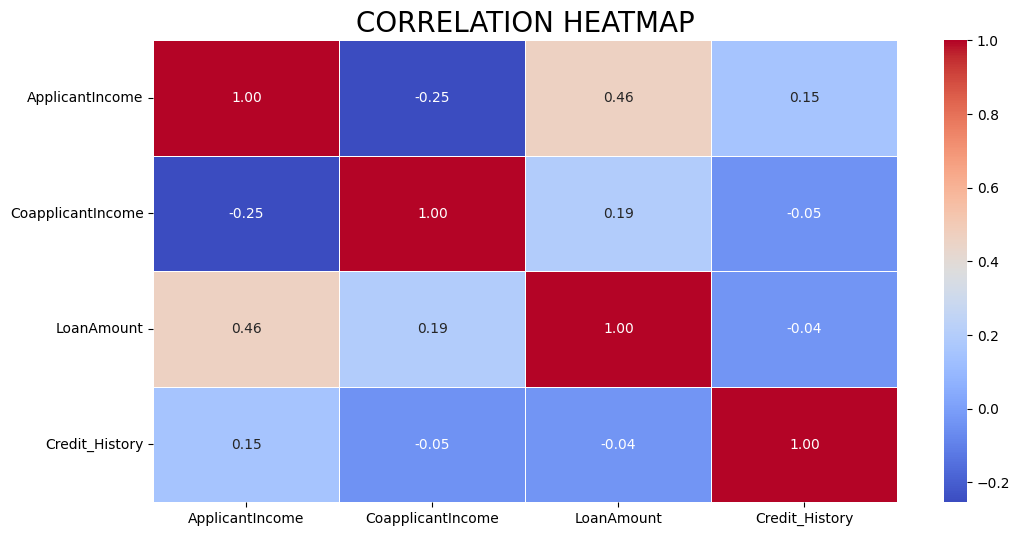

In [ ]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Credit_History']
corr = df[num_cols].corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('CORRELATION HEATMAP',fontsize=20)
plt.show()

Insights from Correlation Heatmap

ApplicantIncome and LoanAmount have a positive correlation, indicating that higher applicant incomes tend to be associated with larger loan amounts. This aligns with the intuitive understanding that borrowers with higher incomes request larger loans, possibly due to higher repayment capacity.

CoapplicantIncome shows a moderate positive correlation with LoanAmount, suggesting that when there is a coapplicant with higher income, the total loan amount requested tends to be bigger. This highlights the combined earning potential’s role in loan size determination.

The correlation between ApplicantIncome and CoapplicantIncome is very low or near zero, which suggests that the incomes of primary applicants and coapplicants vary independently in this dataset.

Credit_History has weak or negligible correlation with the other numeric variables, reflecting that this binary or categorical feature (often 0 or 1) may not directly move in tandem with continuous income or loan size variables. However, it remains vital for approval decisions as a risk indicator.


* Create a stacked bar chart to show the distribution of categorical
variables across multiple categories.



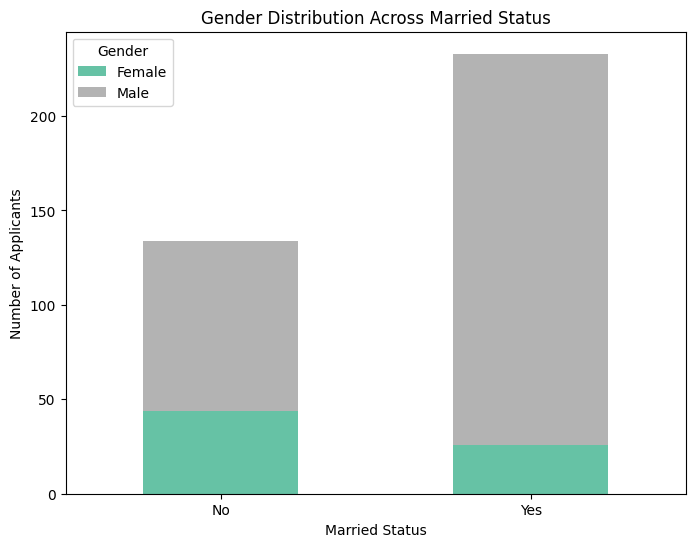

In [ ]:
ct = pd.crosstab(df['Married'], df['Gender'])

ct.plot(kind='bar', stacked=True, figsize=(8,6), colormap='Set2')

plt.title('Gender Distribution Across Married Status')
plt.xlabel('Married Status')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()


The stacked bar chart illustrating Gender distribution across Married status reveals distinct demographic patterns in the loan applicant pool. It shows that a significantly larger proportion of married applicants are male, indicating that males are more likely to be married loan applicants. Conversely, among unmarried applicants, while males still dominate, the proportion of female applicants is comparatively higher than in the married group.


Such insights are valuable for designing targeted lending products and tailoring credit risk assessments that consider borrower demographics effectively.

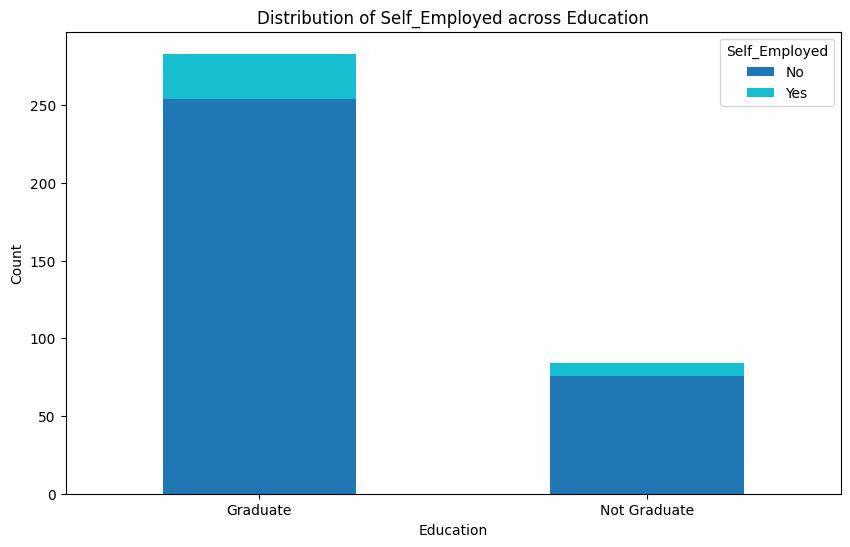

In [ ]:
pd.crosstab(df['Education'], df['Self_Employed']).plot(
    kind='bar', stacked=True, figsize=(10,6), colormap='tab10'
)
plt.title('Distribution of Self_Employed across Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Self_Employed')
plt.show()


The stacked bar chart depicting the distribution of Self_Employed applicants across different education levels indicates that individuals with higher education are more likely to be self-employed. The chart shows a visibly larger segment of self-employed individuals within the educated group, suggesting a strong association between education and self-employment status. Conversely, less educated applicants tend to be predominantly salaried or not self-employed, highlighting a possible link between higher education and entrepreneurial or self-employed pursuits. This insight could be useful for understanding employment patterns among borrowers and tailoring financial products or risk assessments based on education and employment status.

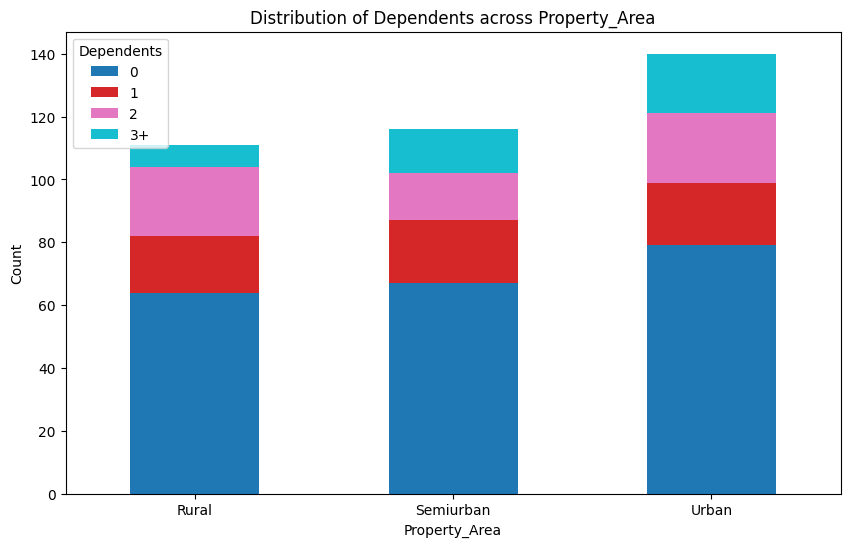

In [ ]:
pd.crosstab(df['Property_Area'], df['Dependents']).plot(
    kind='bar', stacked=True, figsize=(10,6), colormap='tab10'
)
plt.title('Distribution of Dependents across Property_Area')
plt.xlabel('Property_Area')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Dependents')
plt.show()


The stacked bar chart showing the distribution of Dependents across Property_Area reveals that applicants from semiurban areas make up the largest group across most dependent categories. Applicants with zero dependents dominate in all property areas, especially in urban and semiurban regions. Rural areas show a slightly higher proportion of applicants with one or more dependents, suggesting family size may vary with geographic location. This insight can assist in tailoring financial products and support services according to regional demographic characteristics.

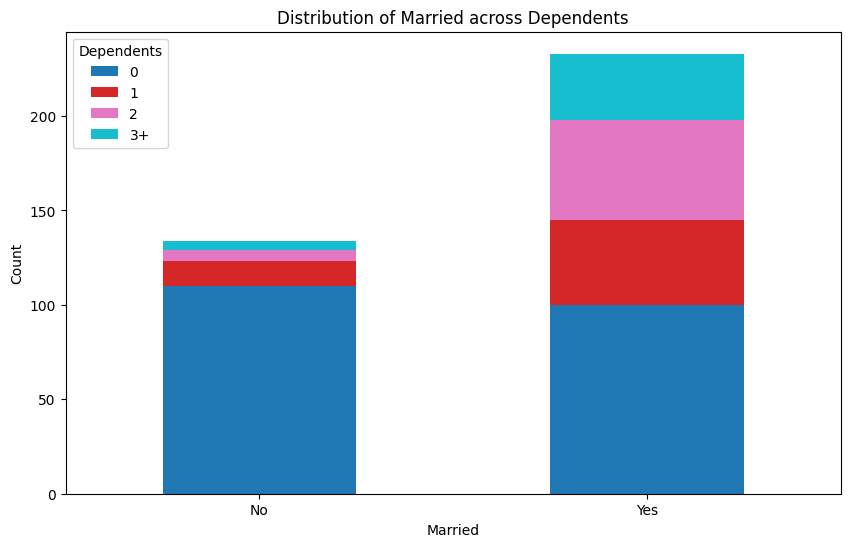

In [ ]:
pd.crosstab(df['Married'], df['Dependents']).plot(
    kind='bar', stacked=True, figsize=(10,6), colormap='tab10'
)
plt.title('Distribution of Married across Dependents')
plt.xlabel('Married')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Dependents')
plt.show()


The stacked bar chart illustrating the distribution of marital status across different numbers of dependents shows that married applicants overwhelmingly dominate across all dependent counts. Most married applicants have zero or one dependent, with fewer reporting two or more dependents. In contrast, unmarried applicants make up a small proportion across all dependent categories, highlighting that larger family responsibilities are mostly associated with married individuals. This insight helps in understanding family dynamics and their potential impact on loan applications and repayment capacity.